<a href="https://colab.research.google.com/github/kdhaas/stc510/blob/main/Module3_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Had to add some extra lines of code in order to get it to read correctly

In [2]:
crime = pd.read_csv('crimestat.csv', engine='python', index_col='INC_NUMBER', error_bad_lines=False,)

Skipping line 131678: unexpected end of data


In [3]:
crime

,OCCURRED_ON,OCCURRED_TO,UCR_CRIME_CATEGORY,100_BLOCK_ADDR,ZIP,PREMISE_TYPE
INC_NUMBER,,,,,,
201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE
...,...,...,...,...,...,...
201700002024419,11/17/2017 04:00,11/17/2017 04:06,BURGLARY,22XX E BROADWAY RD,85040.0,DEPARTMENT / DISCOUNT STORE
201700002027239,11/17/2017 04:15,11/17/2017 04:30,LARCENY-THEFT,16XX E INDIAN SCHOOL RD,85016.0,CONVENIENCE MARKET / STORE
201700002025582,11/17/2017 05:00,11/17/2017 09:50,MOTOR VEHICLE THEFT,43XX N 103RD AVE,85037.0,APARTMENT


In [15]:
crime.sort_values(by=['ZIP', 'UCR_CRIME_CATEGORY', 'PREMISE_TYPE'], inplace=True)

Decided to sort the sheet and make it easier to read in general, and then printed it to a new csv so I could pull it up sorted later if I needed to. 

In [16]:
crime

,OCCURRED_ON,OCCURRED_TO,UCR_CRIME_CATEGORY,100_BLOCK_ADDR,ZIP,PREMISE_TYPE
INC_NUMBER,,,,,,
201600000755920,04/24/2016 20:13,04/24/2016 20:13,AGGRAVATED ASSAULT,12XX S 7TH AVE,85003.0,APARTMENT
201600000872725,05/11/2016 23:40,NaN,AGGRAVATED ASSAULT,1XX W PIMA ST,85003.0,APARTMENT
201600001040270,06/05/2016 17:39,NaN,AGGRAVATED ASSAULT,14XX S 3RD AVE,85003.0,APARTMENT
201600001320744,07/17/2016 22:12,NaN,AGGRAVATED ASSAULT,XX W MONROE ST,85003.0,APARTMENT
201600001554342,08/21/2016 22:04,NaN,AGGRAVATED ASSAULT,13XX S 3RD AVE,85003.0,APARTMENT
...,...,...,...,...,...,...
201700001479521,08/23/2017 00:00,NaN,LARCENY-THEFT,5XX W THOMAS RD,85396.0,PARKING LOT
201700001423294,08/10/2017 17:00,08/11/2017 15:00,MOTOR VEHICLE THEFT,75XX W THOMAS RD,85396.0,PARKING LOT
201700000368400,02/18/2017 12:00,02/27/2017 15:23,LARCENY-THEFT,122XX N TABLE TOP RD,NaN,FENCED RESIDENTIAL YARD


In [18]:
crime.to_csv('crime_sorted.csv')

In [20]:
czip = crime.groupby('ZIP')

In [24]:
ccat = czip.UCR_CRIME_CATEGORY.value_counts()

In [27]:
ccat.to_csv('crime_category_byzip.csv')

In [60]:
crime_category = pd.read_csv('crime_category_byzip.csv', index_col='ZIP')

Decided to narrow the information to try and build visuals. The goal is to build visals on the frequency of crime types in different zip codes.

In [61]:
crime_category

,UCR_CRIME_CATEGORY,Frequency
ZIP,,
85003.0,LARCENY-THEFT,758
85003.0,DRUG OFFENSE,194
85003.0,BURGLARY,179
85003.0,MOTOR VEHICLE THEFT,128
85003.0,AGGRAVATED ASSAULT,120
...,...,...
85395.0,AGGRAVATED ASSAULT,1
85395.0,RAPE,1
85396.0,LARCENY-THEFT,2


In [63]:
zip = crime_category.groupby('ZIP')

Below is the prof of concept, which is the visualization of crime types in a specific zip code. 

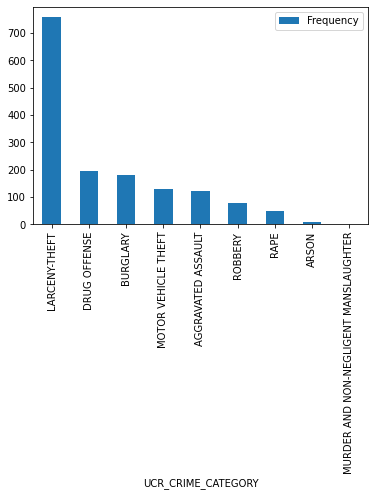

In [102]:
zip.get_group(85003.0).plot.bar(x='UCR_CRIME_CATEGORY')

In [93]:
zip.groups

{85003.0: [85003.0, 85003.0, 85003.0, 85003.0, 85003.0, 85003.0, 85003.0, 85003.0, 85003.0], 85004.0: [85004.0, 85004.0, 85004.0, 85004.0, 85004.0, 85004.0, 85004.0, 85004.0, 85004.0], 85006.0: [85006.0, 85006.0, 85006.0, 85006.0, 85006.0, 85006.0, 85006.0, 85006.0, 85006.0], 85007.0: [85007.0, 85007.0, 85007.0, 85007.0, 85007.0, 85007.0, 85007.0, 85007.0, 85007.0], 85008.0: [85008.0, 85008.0, 85008.0, 85008.0, 85008.0, 85008.0, 85008.0, 85008.0, 85008.0], 85009.0: [85009.0, 85009.0, 85009.0, 85009.0, 85009.0, 85009.0, 85009.0, 85009.0, 85009.0], 85012.0: [85012.0, 85012.0, 85012.0, 85012.0, 85012.0, 85012.0, 85012.0, 85012.0, 85012.0], 85013.0: [85013.0, 85013.0, 85013.0, 85013.0, 85013.0, 85013.0, 85013.0, 85013.0, 85013.0], 85014.0: [85014.0, 85014.0, 85014.0, 85014.0, 85014.0, 85014.0, 85014.0, 85014.0, 85014.0], 85015.0: [85015.0, 85015.0, 85015.0, 85015.0, 85015.0, 85015.0, 85015.0, 85015.0, 85015.0], 85016.0: [85016.0, 85016.0, 85016.0, 85016.0, 85016.0, 85016.0, 85016.0, 85016.

Was able to generate a chart for every zip displaying the crime frequency. Only issue is it does not display what zip it is showing for!

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


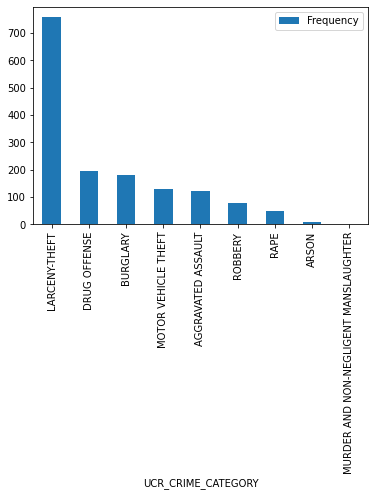

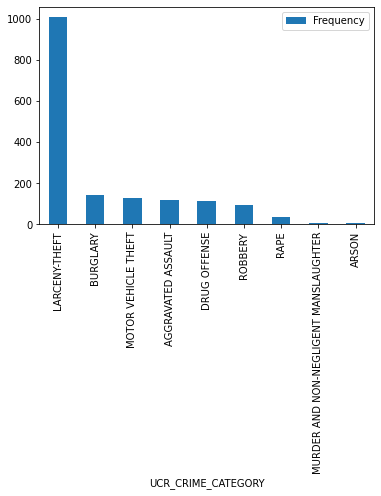

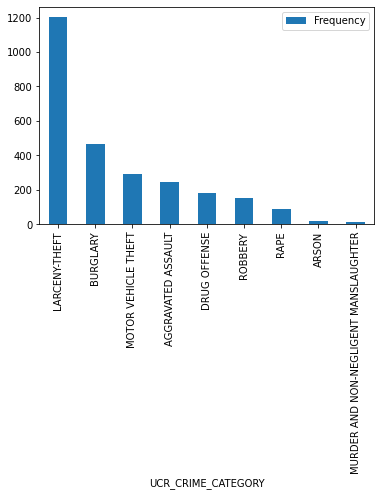

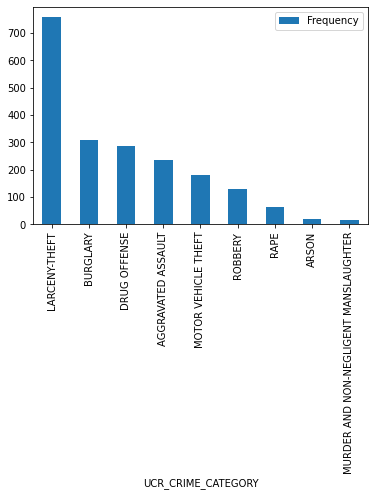

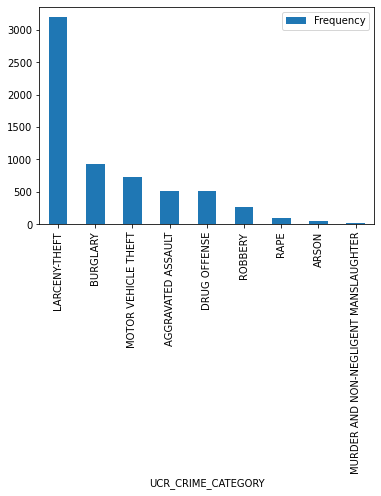

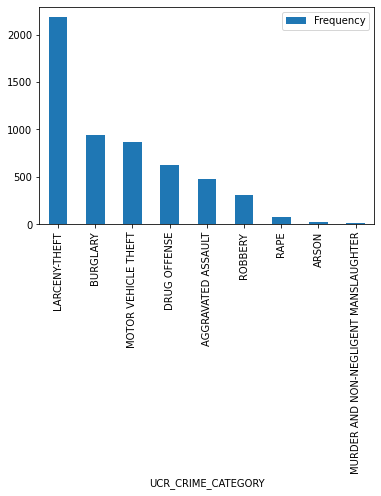

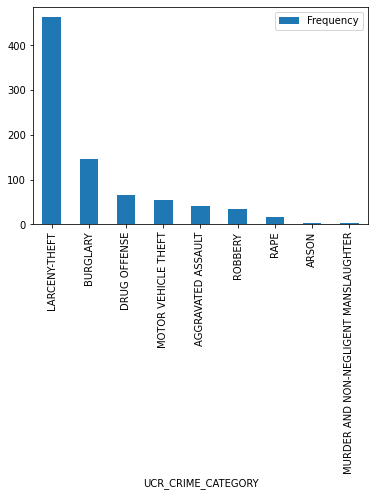

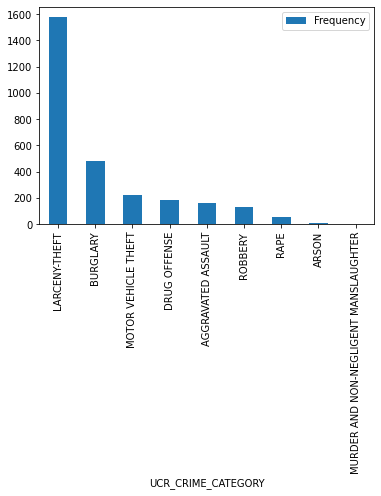

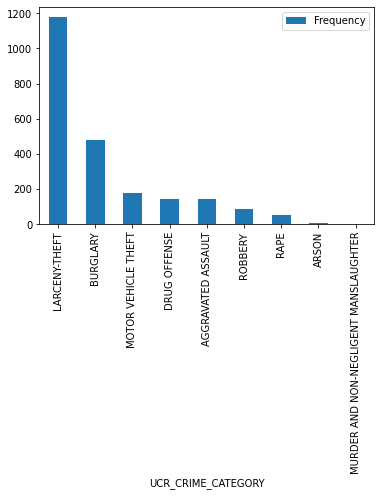

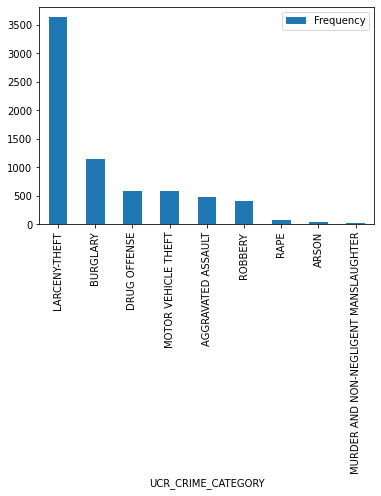

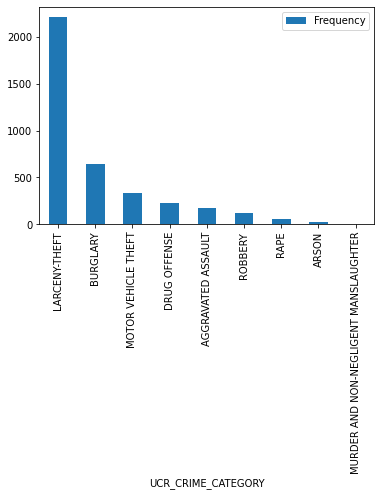

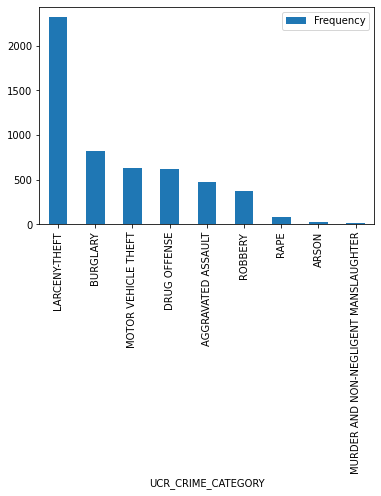

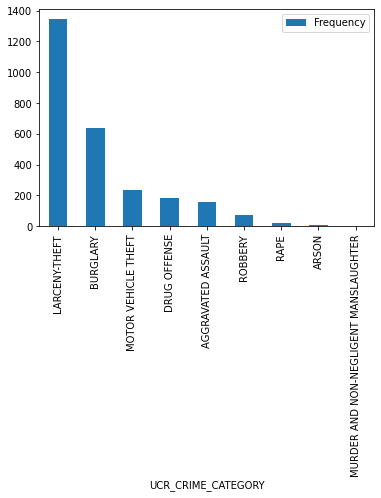

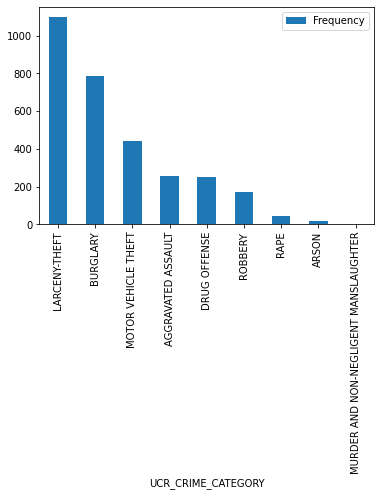

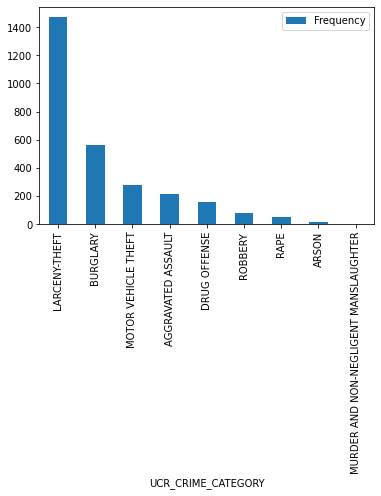

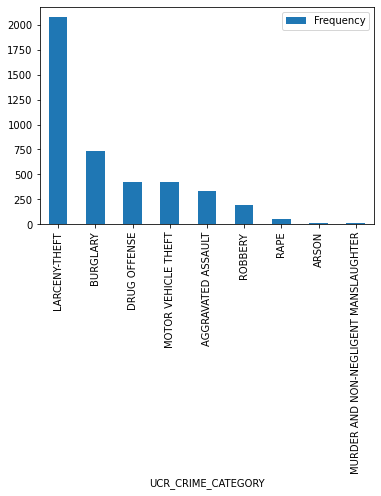

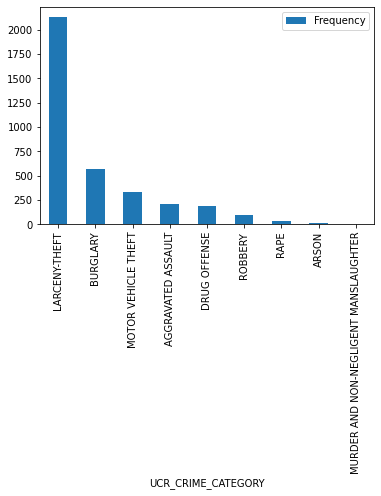

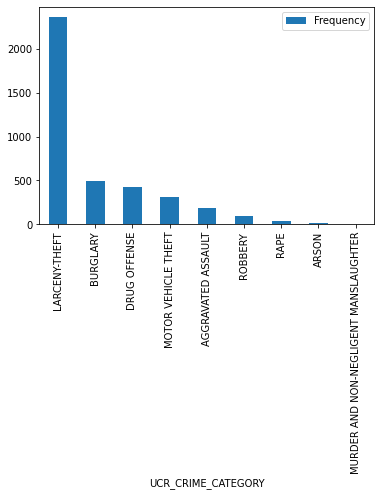

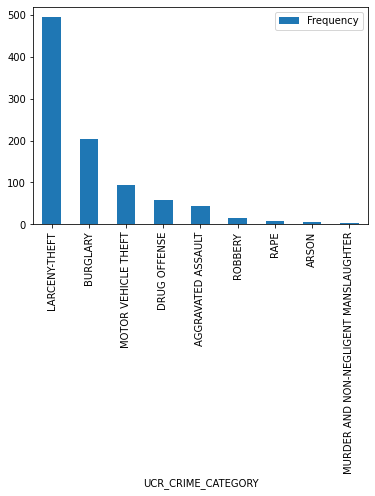

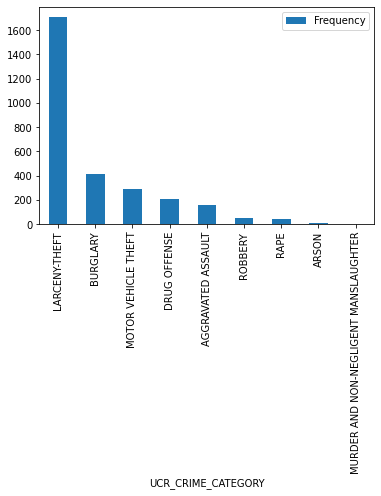

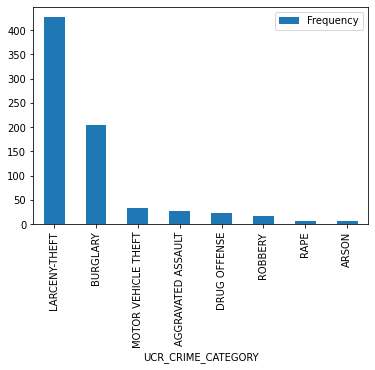

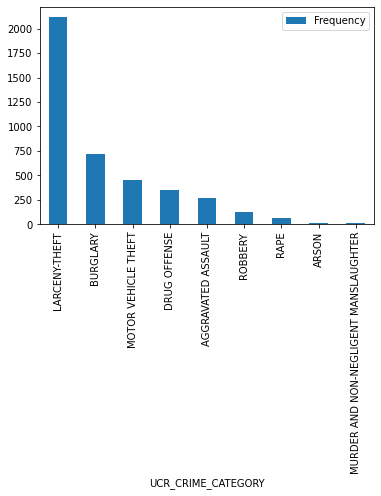

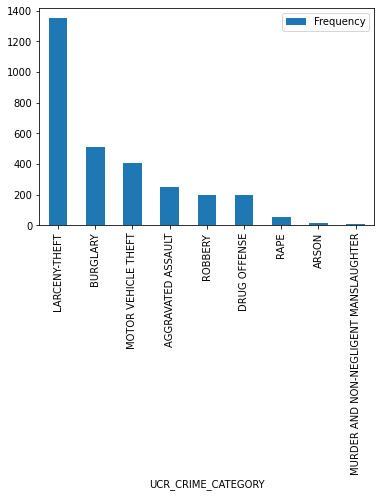

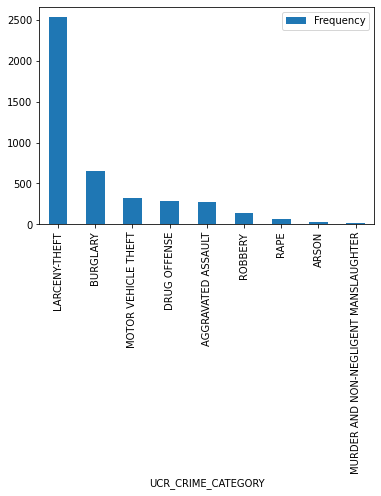

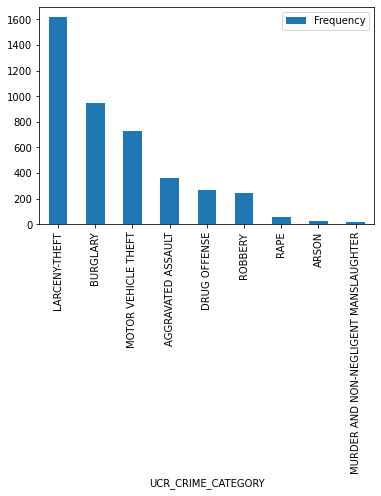

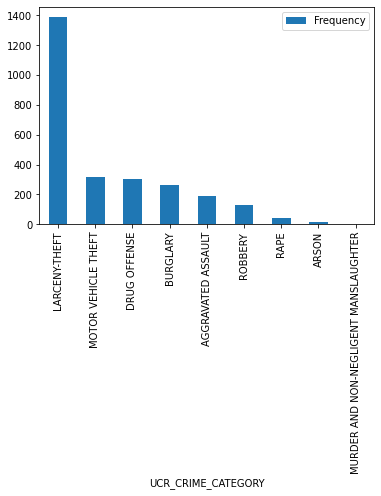

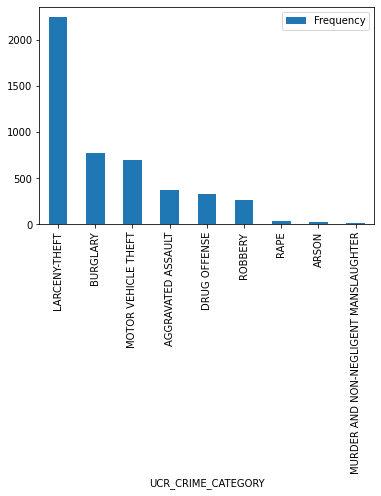

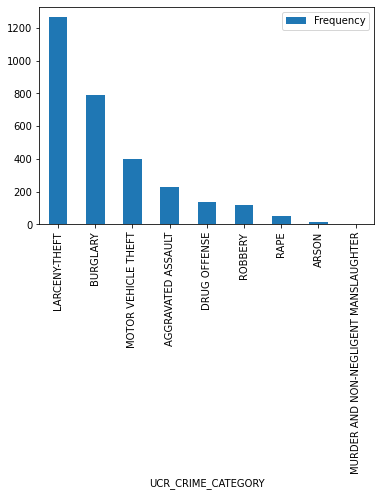

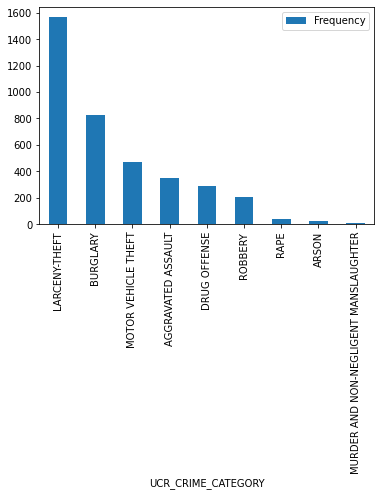

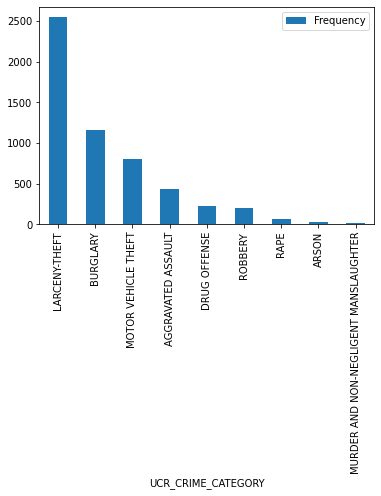

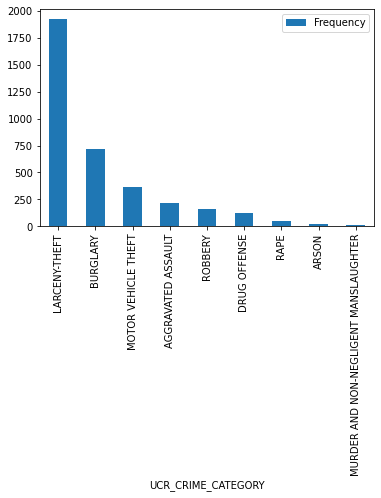

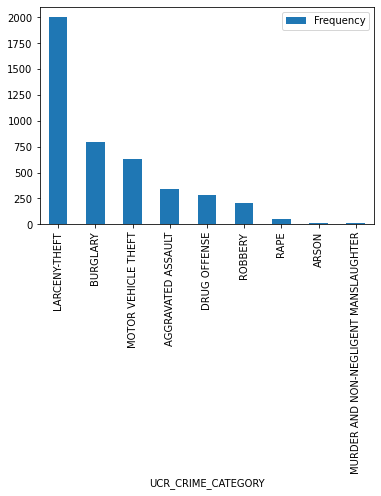

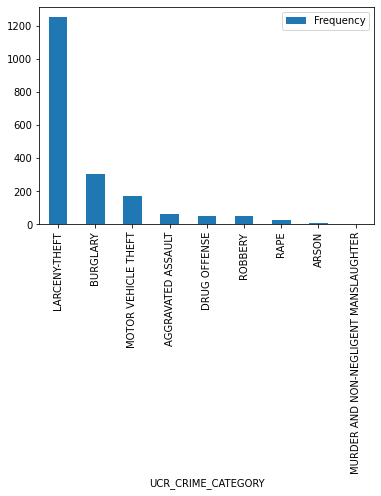

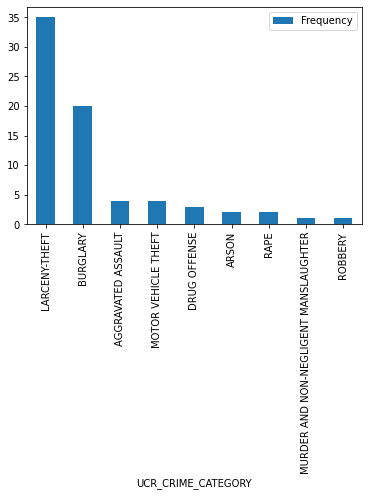

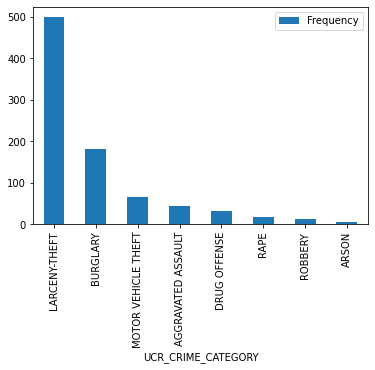

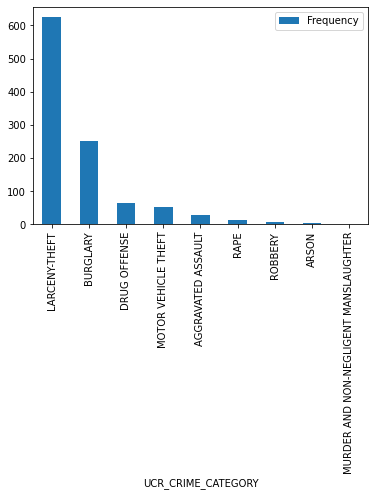

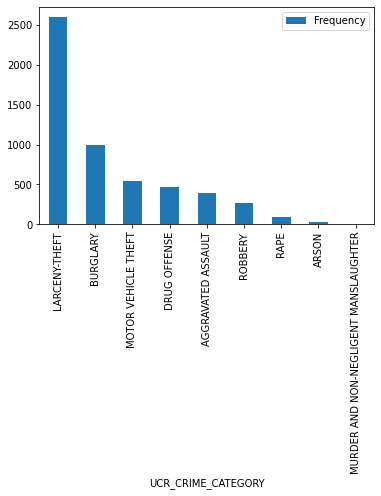

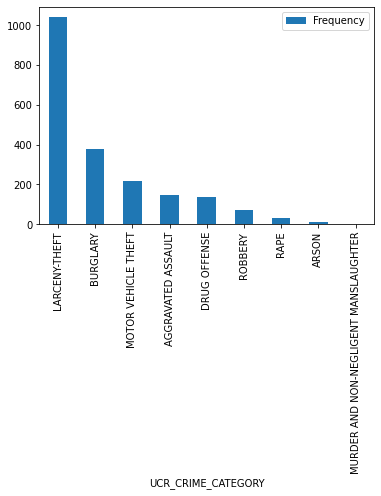

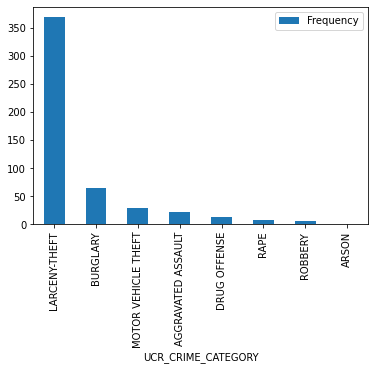

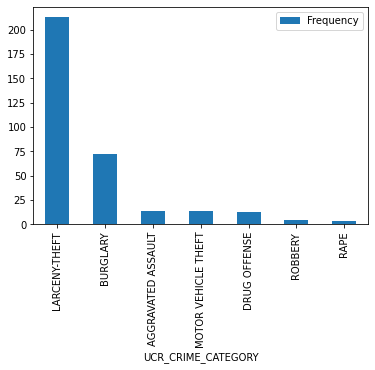

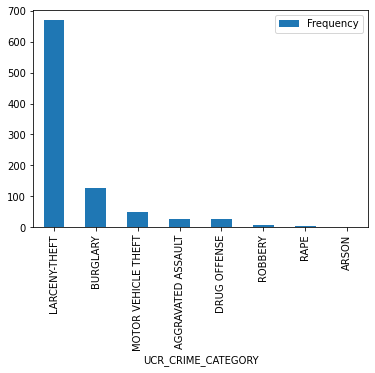

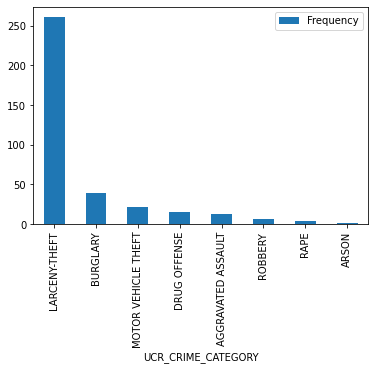

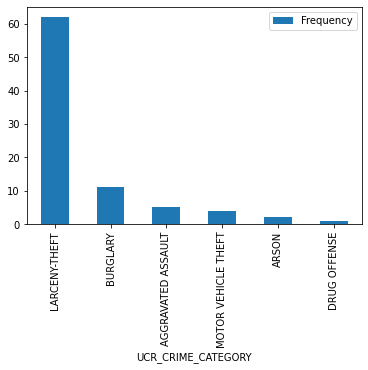

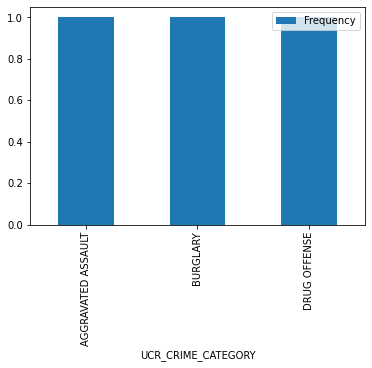

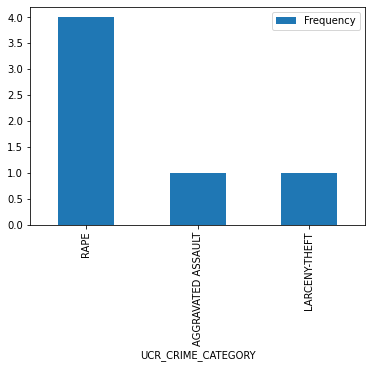

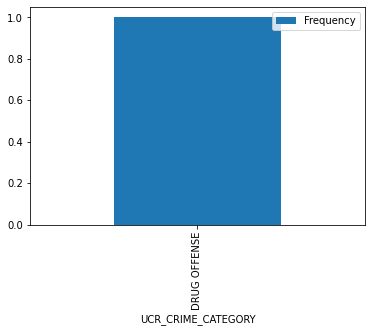

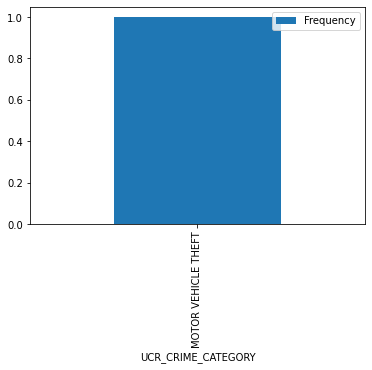

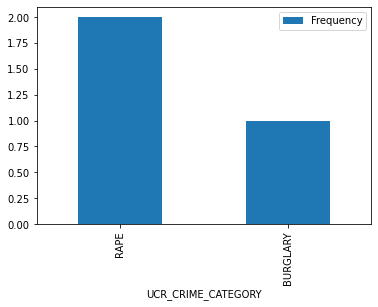

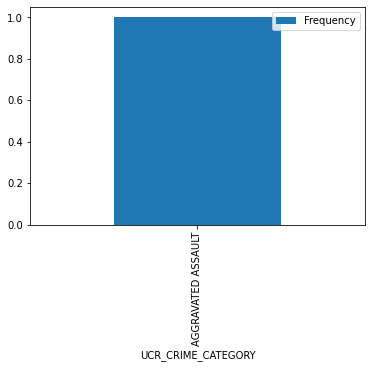

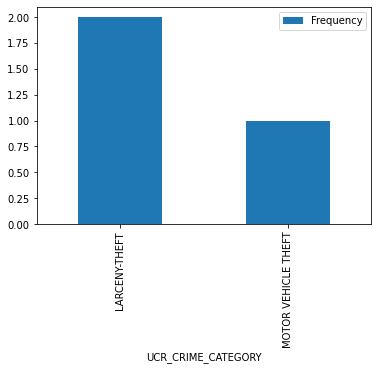

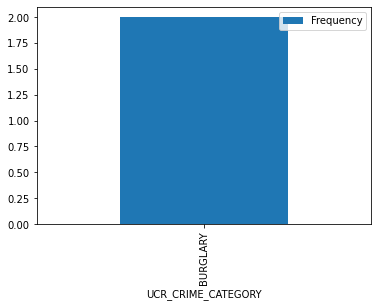

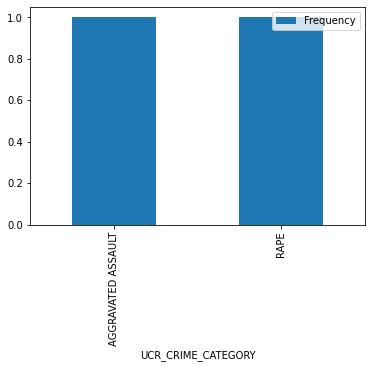

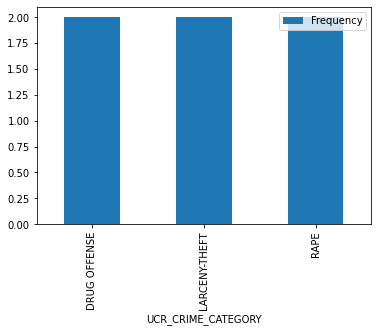

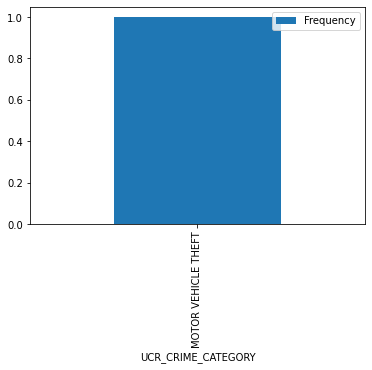

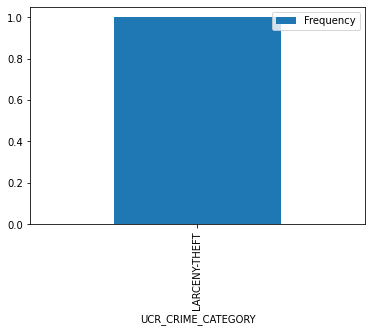

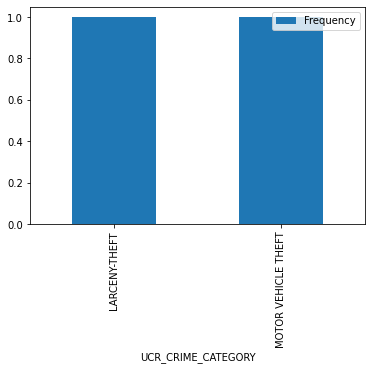

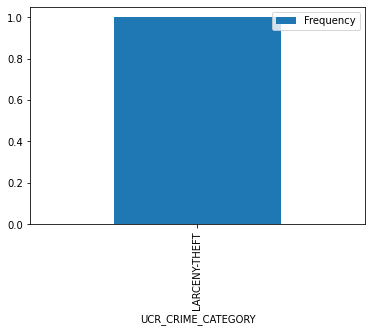

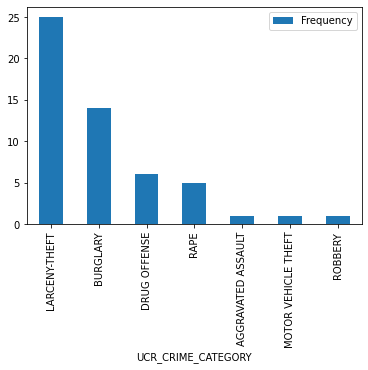

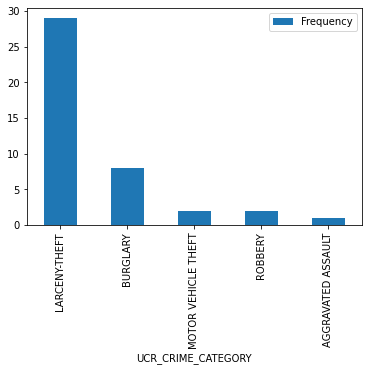

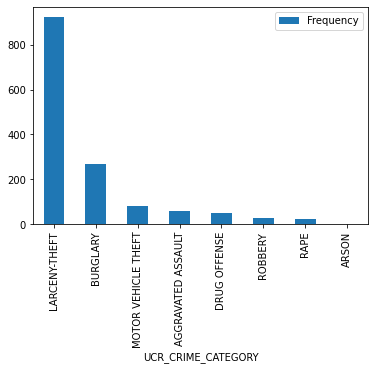

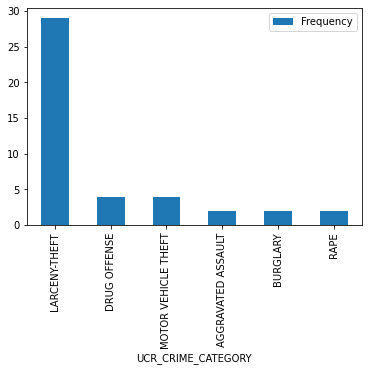

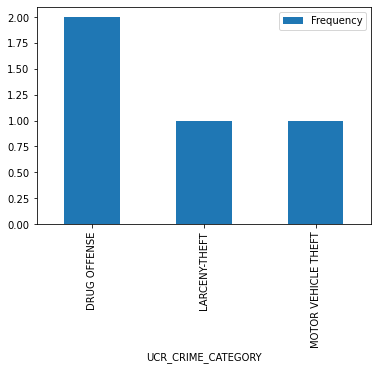

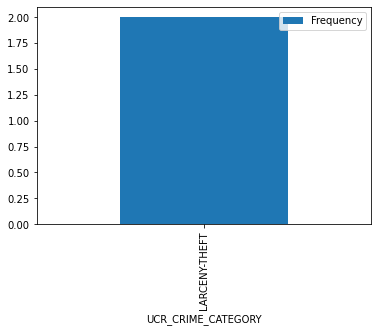

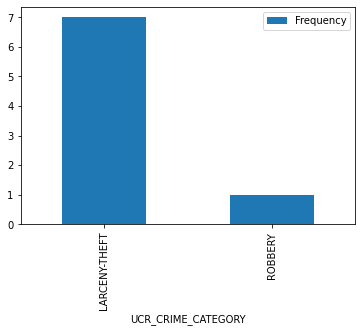

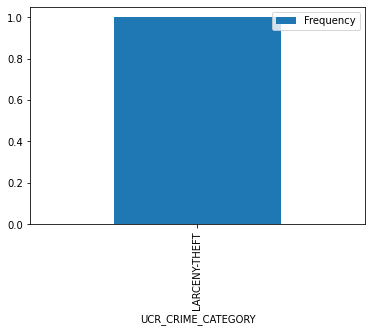

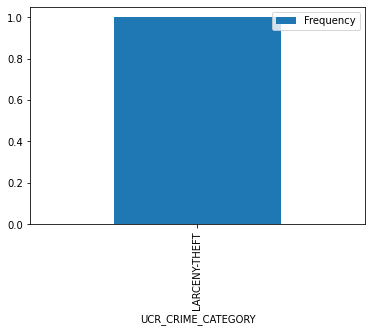

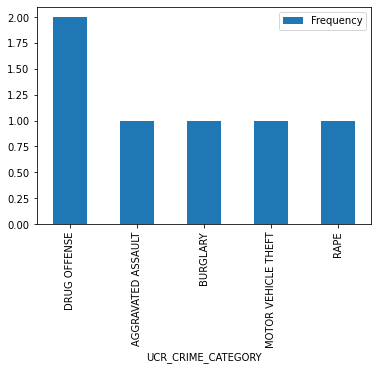

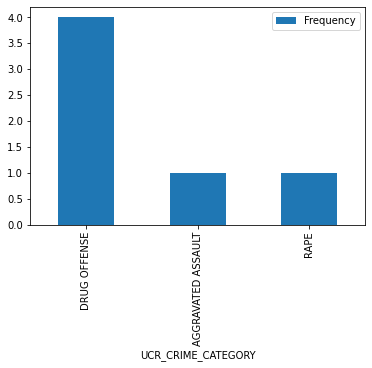

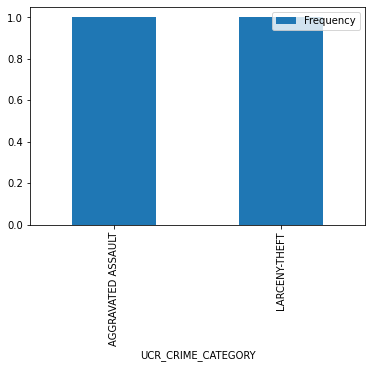

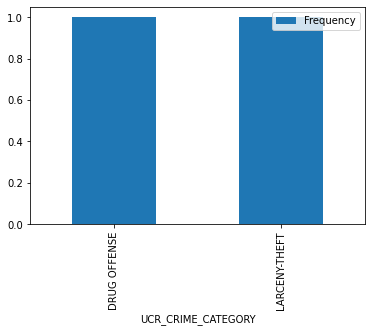

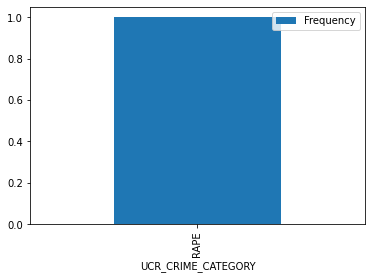

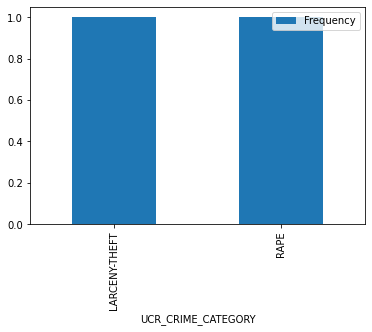

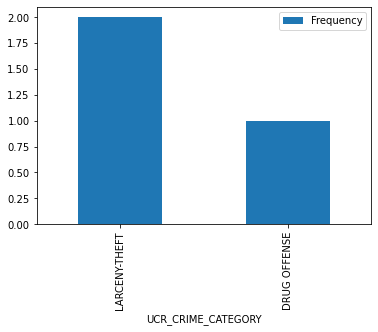

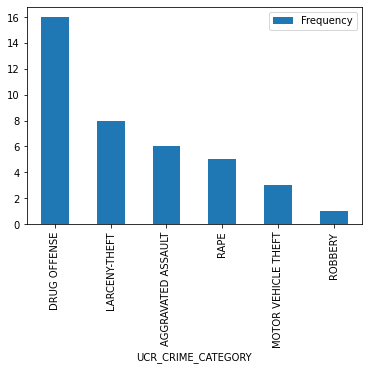

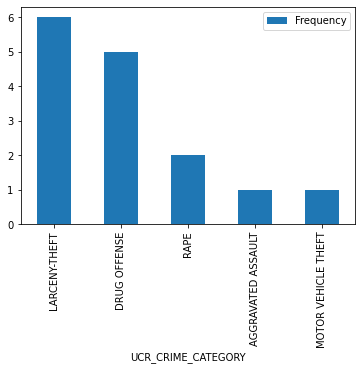

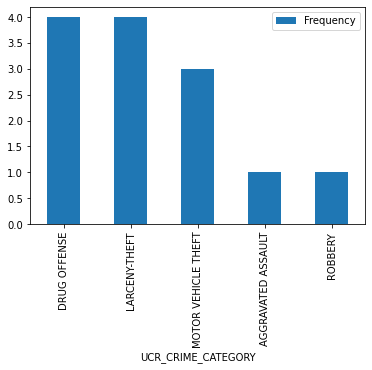

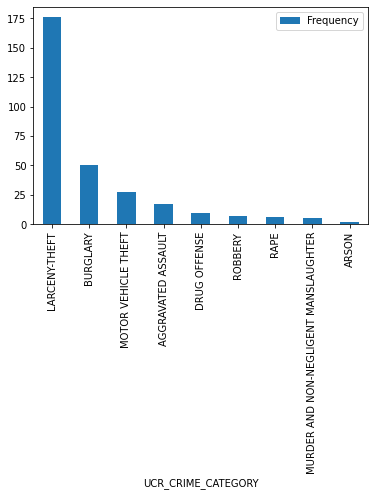

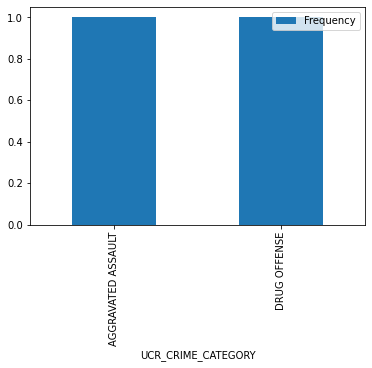

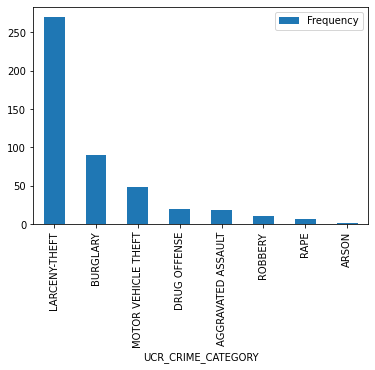

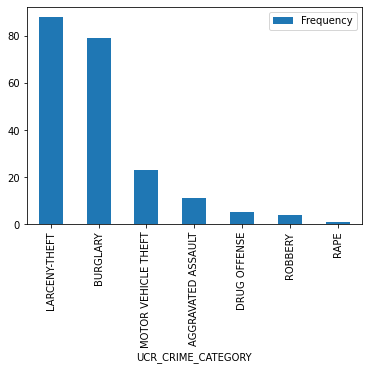

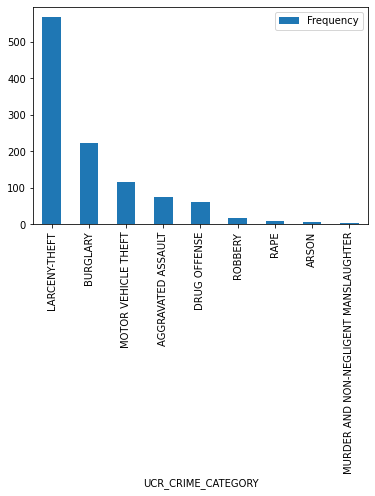

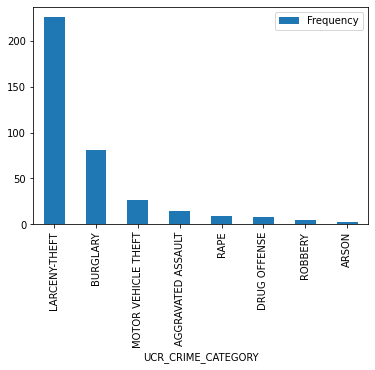

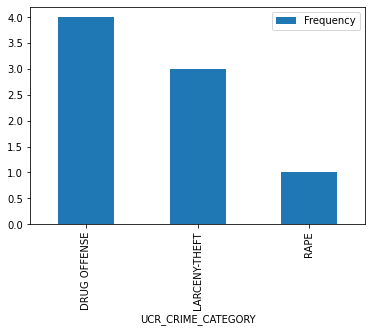

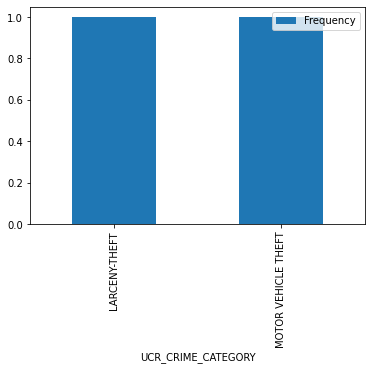

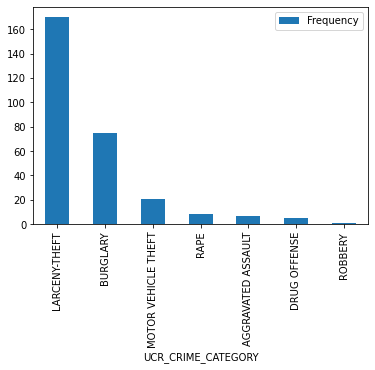

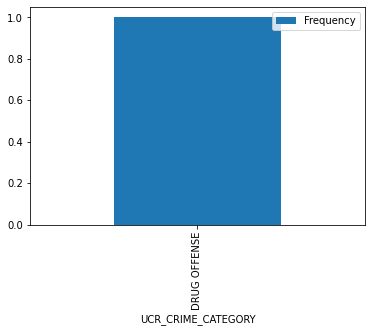

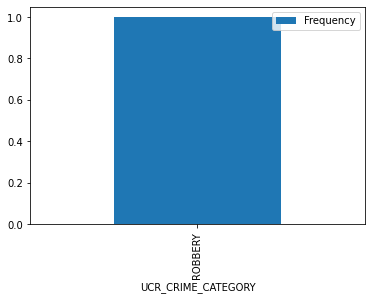

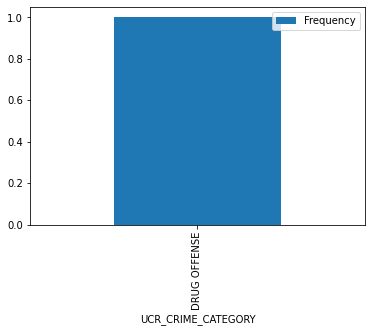

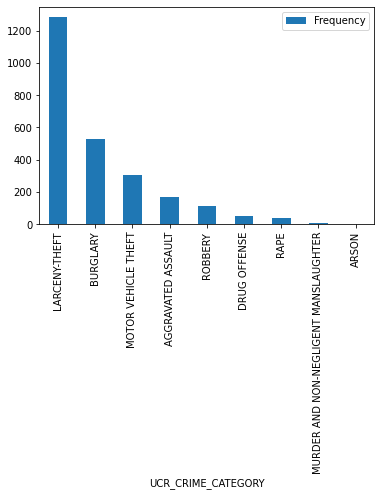

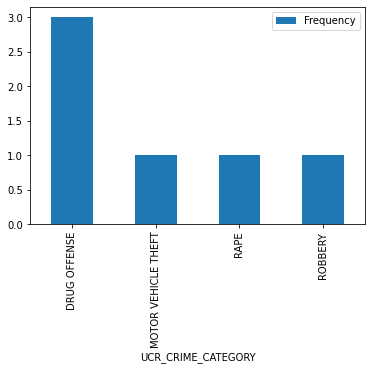

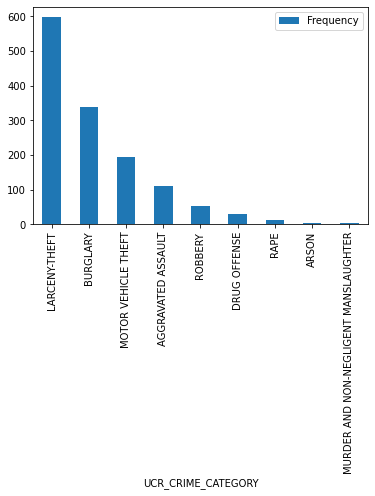

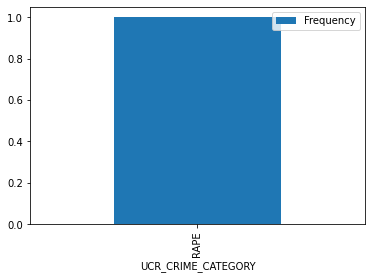

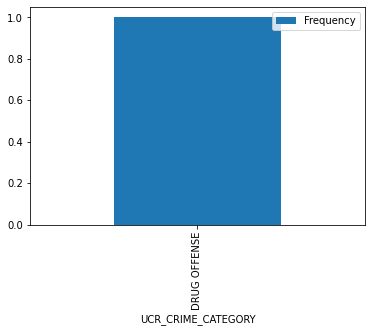

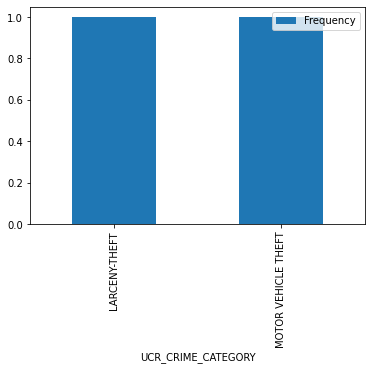

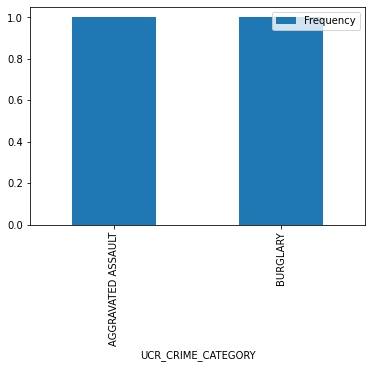

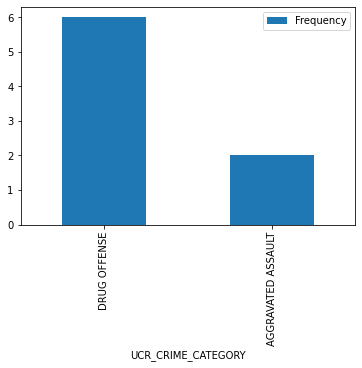

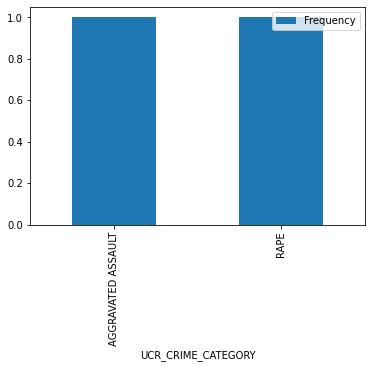

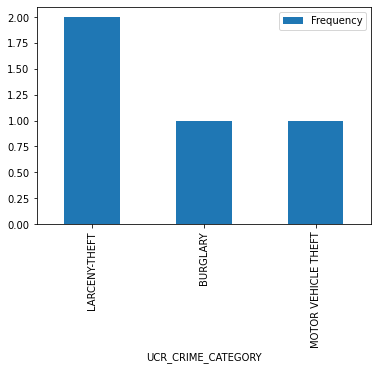

In [112]:
zip2 = crime_category.groupby('ZIP').plot.bar(x='UCR_CRIME_CATEGORY')

In [121]:
zip2.to_excel('charts.xlsx')

I am fairly satisfied with where the data set is, and it is sorted and grouped in such a way that it is easy to generate reports. Besides the titling issue, which I haven't figured out yet. Below is the function I would use to generate isolated reports per zip on crime. 

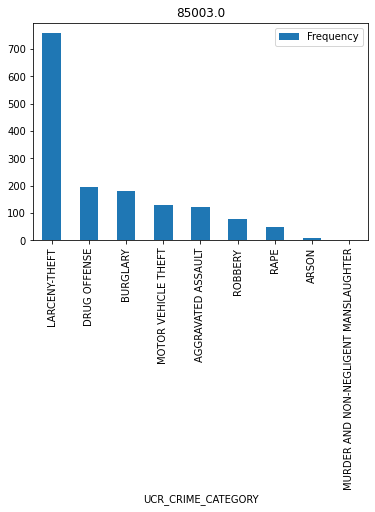

In [122]:
zip.get_group(85003.0).plot.bar(x='UCR_CRIME_CATEGORY', title= '85003.0')